# **Bank Churn:**

<h1><center>Exploratory Data Analysis (Deep Dive) - Self Learning</center></h1>
<h1><center>Ravi Thej Pilla</center></h1>
<h1><center>Last Modified: 18th May 2025</center></h1>

## Project Context:  
- **Business Problem:** Analyze customer attrition ("churn") in a retail bank to identify factors driving account closure and inactivity.  
- **Data Source:** Internal CRM and transaction logs, combined with demographic and credit history records for $115640$ customers.  
- **Stakeholders:** Retention team, product managers, marketing, and executive leadership aiming to reduce churn by $5-7 \%$.

## Key Objectives:  
- **Churn Rate Assessment:** Quantify overall and segment-level churn rates (e.g., by customer segment, tenure bracket).  
- **Feature Importance Exploration:** Determine which customer attributes (demographics, credit metrics, product usage) have the strongest association with churn.  
- **Customer Profiling:** Characterize high-risk cohorts through clustering and cross-tabulations (e.g., age group - income - product mix).  
- **Actionable Insights:** Recommend targeted interventions (e.g., tailored communication channels or product bundles) to reduce attrition.

## EDA Goals:  
1. **Data Ingestion & Profiling:**  
   - Load and validate schema; confirm data types and integrity  
   - Generate summary statistics and null-value heatmap  
2. **Univariate Analysis:**  
   - Plot histograms/boxplots for numerical features to assess distribution and outliers  
   - Frequency bar charts for categorical variables  
3. **Bivariate Analysis Against Churn:**  
   - Cross-tabulations and chi-square tests for categorical vs. churn  
   - Point-biserial correlations and t-tests for numerical vs. churn  
   - Visualize with violin plots, stacked bar charts, and correlation heatmap  
4. **Multivariate & Interaction Effects:**  
   - Pairwise scatterplots for top correlated variables  
   - Logistic regression coefficients and feature importance from tree-based models  
5. **Feature Engineering:**  
   - Derive age from DOB; bucket age, tenure, and income into segments  
   - Compute debt-to-income ratio, credit utilization metrics  
6. **Outlier Detection & Treatment:**  
   - Identify extreme values (e.g., z-score method) in Balance and Outstanding Loans  
   - Decide on capping, transformation, or removal strategies  
7. **Data Quality & Preprocessing:**  
   - Impute or drop missing values; convert dates to datetime  
   - Encode categorical variables (one-hot, target encoding)  
   - Scale or normalize numeric features as needed  
8. **Documentation & Next Steps:**  
   - Summarize key findings in markdown/report  
   - Propose further analyses (e.g., survival analysis, customer lifetime value modeling, cross-sell propensity)

**Extra:** Explore customer profitability segmentation (e.g., RFM analysis), product-cross-sell opportunities, and early warning anomaly detection for fraudulent or risky behavior.

## Data Description:  

This dataset captures **customer attrition** information for a retail bank, containing **$115640$ observations** and **$22$ variables**. Customer churn (also called customer attrition) is the event when a customer ends their relationship with the bank, a key metric for retention analytics. The dataset merges **demographic**, **financial**, **behavioral**, and **geographic** attributes to support exploratory and predictive modeling.

| Column                              | Type         | Description & Notes                                                                                                                                     |
|-------------------------------------|--------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Surname**, **First Name**         | Categorical  | Customer's names. Primarily identifiers; Synthetic data |
| **Date of Birth**                   | Date/String  | Stored as string; converted to datetime to derive **Age**. Enables cohort analysis by birth - e.g., age-based retention.            |
| **Gender**, **Marital Status**, **Education Level** | Categorical  | Demographic segments (i.e., 'Male'/'Female', 'Divorced'/'Married'/'Single', 'High School'/"Master's"/"Bachelor's"/'Diploma'). Useful for profiling high-risk cohorts. |
| **Number of Dependents**            | Numerical    | Integer count of dependents. Proxy for household size and potential financial burden.                                           |
| **Occupation**                      | Categorical  | Customer's employment category. May correlate with income stability and churn propensity.                                         |
| **Income**, **Balance**, **Outstanding Loans** | Numerical    | Continuous financial metrics. **Income** (annual), **Balance** (current account balance), **Outstanding Loans** (total debt). Models risk and liquidity.
| **Credit Score**, **Credit History Length** | Numerical    | Creditworthiness indicators: FICO-style score and years of history. Inform credit risk and may influence churn.                  |
| **Customer Tenure**                 | Numerical    | Time since account opening (e.g., in months or years). Often inversely related to churn risk.                                    |
| **Customer Segment**                | Categorical  | Bank's internal segmentation (e.g., 'Premium', 'Standard', 'Basic'). Guides product offering and retention tactics.              |
| **Preferred Communication Channel** | Categorical  | Customer's favored outreach medium (e.g., 'Email', 'Phone', 'SMS'). Critical for targeted retention campaigns.                 |
| **NumOfProducts**, **NumComplaints**| Numerical    | **NumOfProducts**: count of bank products held; **NumComplaints**: number of service complaints. Signal engagement and satisfaction. |
| **Churn Flag**                      | Binary       | Target variable: `1` indicates customer churned, `0` retained. Imbalanced $(\approx 12 \%$ churn rate$)$.                                   |
| **Churn Reason**                    | Categorical  | Stated explanation for churn events (e.g., 'High fees', 'Poor service'). May be given arbitarily.  |
| **zip_code**, **Address**           | Categorical  | Geo-location fields. **zip_code** for regional analysis; **Address** for potential geocoding (e.g., income by neighborhood). |

> **Note:** Some fields (e.g., names, raw address) are synthetic data so no need to worry about data theft or breach - As per the data extractor.  
> **Might-be:** The dataset appears modeled on IBM's sample churn data, but column ordering and naming differ slightly. Exact definitions (e.g., tenure units) should be confirmed with data owners.  



### **Importing the necessary libraries**

In [14]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Loading the dataset**

In [16]:
data = pd.read_csv('/content/drive/MyDrive/Projects/bank_churn_data.csv')

### **Copying dataset**

In [17]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## **Data Inspection & Cleaning:**

Before I dive into modeling, I need to inspect data types, identify missing values, and convert columns to appropriate formats to ensure data integrity and analytical accuracy.

- Check column data types to confirm numerical vs. categorical variables and spot any anomalies (e.g., dates stored as strings).
- Convert "Date of Birth" to datetime so we can derive age and perform time-based calculations.
- Identify missing values across all columns to decide on imputation or removal strategies.

In [18]:
df.info() # Info will give the data type set.
# df['Income'].info() This will give the size of specific coloumn i.e., number of rows of that columns
# df['Address'].info()
# display(df.info()) This will give all the executions to print on the display.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Surname                          115640 non-null  object 
 1   First Name                       115640 non-null  object 
 2   Date of Birth                    115640 non-null  object 
 3   Gender                           115640 non-null  object 
 4   Marital Status                   115640 non-null  object 
 5   Number of Dependents             115640 non-null  int64  
 6   Occupation                       115640 non-null  object 
 7   Income                           115640 non-null  float64
 8   Education Level                  115640 non-null  object 
 9   Address                          115640 non-null  object 
 10  Customer Tenure                  115640 non-null  int64  
 11  Customer Segment                 115640 non-null  object 
 12  Pr

**Observations on the data set given:**

- The dataset comprises $22$ columns in total:

 - $11$ are numerical $($$3$ of these with floating-point precision and $8$ as integer counts$)$

 - $11$ are categorical.  

- All $115640$ records are complete - no variable contains missing or null values.  

- Key structural notes:  

  - **Object-dtype** fields (e.g., names, dates stored as strings, categorical attributes) will require appropriate conversion or encoding before analysis.

  - **Date of Birth** is currently an object; converting it to a datetime format will allow us to derive age and perform time-based computations.
    
  - Numeric attributes span **demographics** (e.g., number of dependents), **financial metrics** (e.g., balance, outstanding loans), and **behavioral indicators** (e.g., customer tenure, number of products, number of complaints).  

This confirms that the data is well-populated and ready for type conversion and deeper inspection in subsequent steps.

### Converting Date of Birth from string to date time and then calculating the age:

In [19]:
# 1. Install python-dateutil if not already installed
#    (Uncomment and run in a notebook cell if needed - for online python notebook not requied - but doing in local machines need to install python-dateutil)
# !pip install python-dateutil

# 2. Import the relativedelta function
from dateutil.relativedelta import relativedelta

# 3. Ensure your "Date of Birth" is datetime
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')

# 4. Compute age in full years using relativedelta
df['Age'] = df['Date of Birth'].apply(
    lambda dob: relativedelta(pd.Timestamp.today(), dob).years
) # df['Age'] by default places this at the end of the data table.

# 5. Verify the result
print(df[['Date of Birth', 'Age']].head())


  Date of Birth  Age
0    1987-08-29   37
1    2000-02-07   25
2    1954-02-03   71
3    1991-01-15   34
4    1992-04-08   33


In [20]:
df.info() # Just to cross verify whether the new data "Age" is added to the dataset.
# df.columns.tolist() - This will also verify and show what all columns are present but it won't give data type and non-null count.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Surname                          115640 non-null  object        
 1   First Name                       115640 non-null  object        
 2   Date of Birth                    115640 non-null  datetime64[ns]
 3   Gender                           115640 non-null  object        
 4   Marital Status                   115640 non-null  object        
 5   Number of Dependents             115640 non-null  int64         
 6   Occupation                       115640 non-null  object        
 7   Income                           115640 non-null  float64       
 8   Education Level                  115640 non-null  object        
 9   Address                          115640 non-null  object        
 10  Customer Tenure                  115640 non-

### Missing value checks:

All clear: No missing values found!

Outlier counts (non-zero):
  Churn Flag: 14094


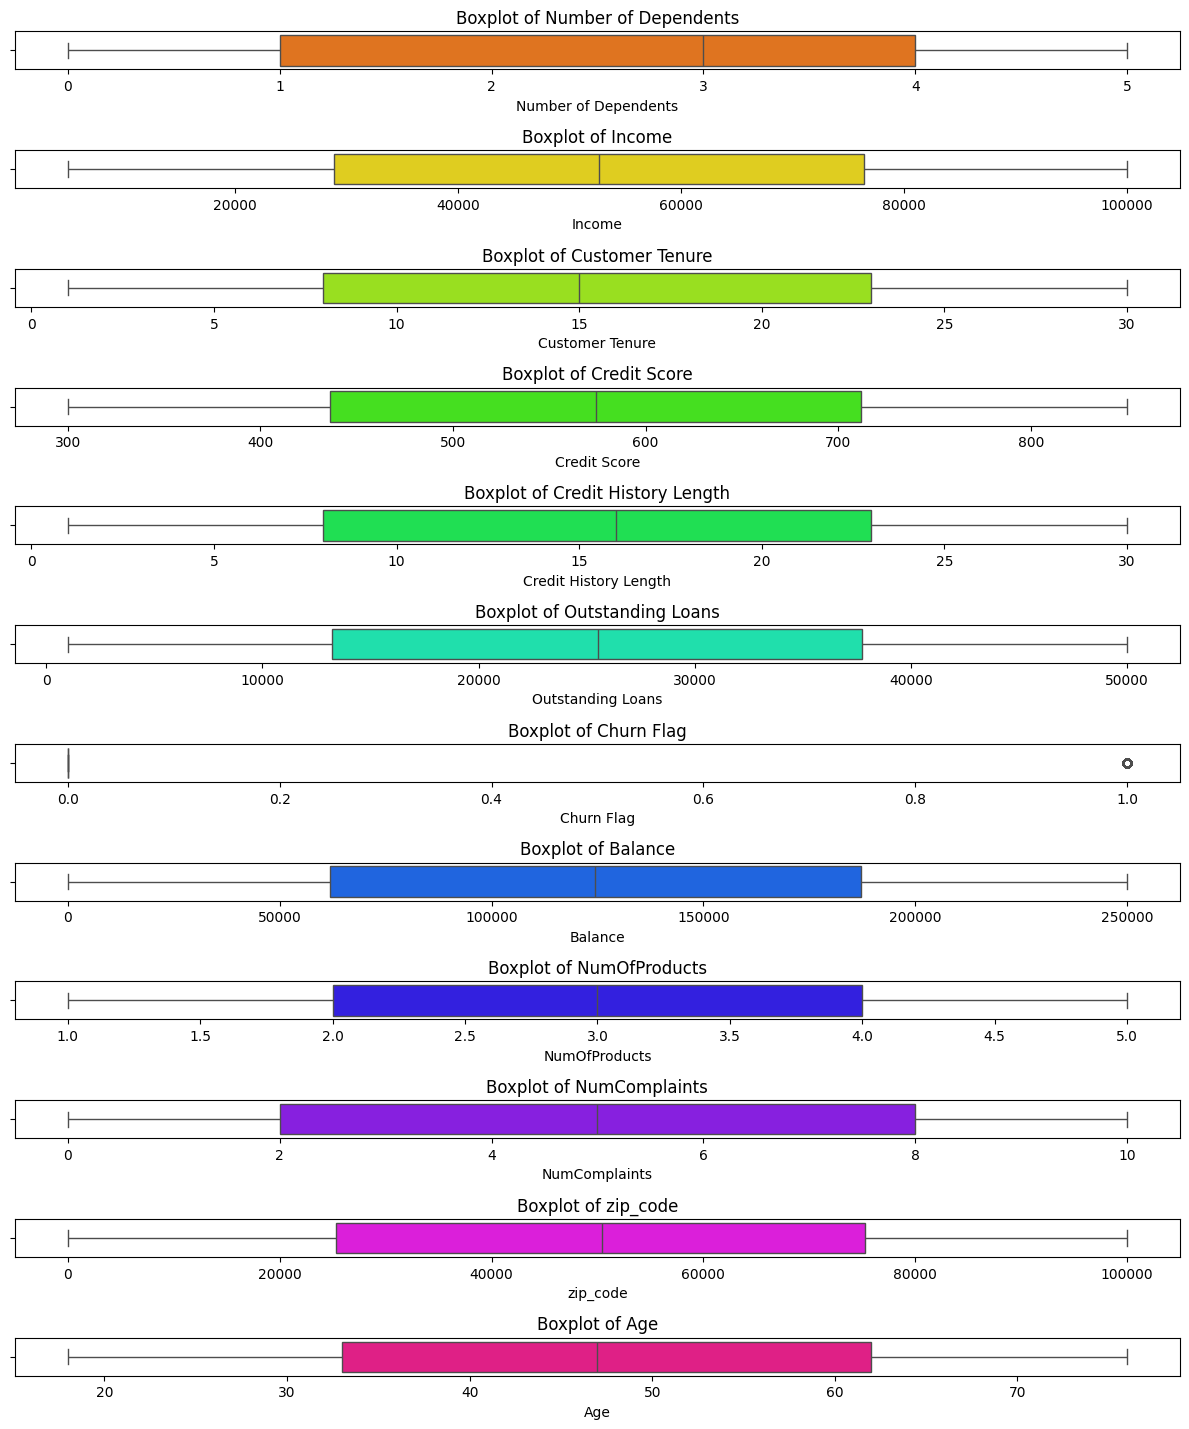

In [21]:
# Conditional Missing-Value and Outlier Reporting + Colorful Boxplots

# 1. Missing values check
missing = df.isna().sum()
missing = missing[missing > 0]
if not missing.empty:
    print("Columns with missing values:")
    print(missing)
else:
    print("All clear: No missing values found!")

# 2. Outlier detection via IQR
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
outlier_counts = {}
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    n_out = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    if n_out > 0:
        outlier_counts[col] = n_out

if outlier_counts:
    print("\nOutlier counts (non-zero):")
    for col, cnt in outlier_counts.items():
        print(f"  {col}: {cnt}")
else:
    print("\nAll clear: No outliers detected!")

# Colorful boxplots
# Generate a palette with one distinct color per column
palette = sns.color_palette('hsv', n_colors=len(num_cols))

# Plot each boxplot with its own color
plt.figure(figsize=(12, len(num_cols) * 1.2))
for i, (col, color) in enumerate(zip(num_cols, palette), 1):
    ax = plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df[col], ax=ax, color=color)
    ax.set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Inferences:**  

- The IQR-based test identifies $14094$ churned customers (Churn Flag $= 1$) as "outliers," merely reflecting the binary nature of the target rather than genuine anomalies in customer behavior.

- No other outlier found apart from Churn Flag as it is binary i.e., $0$ or $1$ like true or false.

**Note:**

*The interquartile range (IQR) is a robust measure of statistical dispersion that represents the spread of the middle $50%$ of your data. It is calculated as the difference between the third quartile ($Q3$, the $75^{th}$ percentile) and the first quartile ($Q1$, the $25^{th}$ percentile) of the distribution.*

### Checking unique values in the data:

In [22]:
df.nunique().sort_values(ascending=False) # Gives count of each columns which is having distinct numbers or categories.
#Unique counts for all columns
for col in df.columns:
    n_unique = df[col].nunique()
    print(f"{col}: {n_unique} distinct values")

    # If categorical (object dtype) and not too many uniques, list them
    if df[col].dtype == 'object' and n_unique <= 10:
        uniques = df[col].unique()
        print("    →", list(uniques))
    print()

Surname: 1000 distinct values

First Name: 690 distinct values

Date of Birth: 21094 distinct values

Gender: 2 distinct values
    → ['Male', 'Female']

Marital Status: 3 distinct values
    → ['Divorced', 'Married', 'Single']

Number of Dependents: 6 distinct values

Occupation: 639 distinct values

Income: 114953 distinct values

Education Level: 4 distinct values
    → ['High School', "Master's", "Bachelor's", 'Diploma']

Address: 114384 distinct values

Customer Tenure: 30 distinct values

Customer Segment: 3 distinct values
    → ['Retail', 'SME', 'Corporate']

Preferred Communication Channel: 2 distinct values
    → ['Phone', 'Email']

Credit Score: 551 distinct values

Credit History Length: 30 distinct values

Outstanding Loans: 114298 distinct values

Churn Flag: 2 distinct values

Churn Reason: 5 distinct values
    → ['No Reason', 'Account Closure', 'Relocation', 'Better Offers Elsewhere', 'Service Issues']

Balance: 115387 distinct values

NumOfProducts: 5 distinct values


**Detailed Observations on Unique values of the data:**

**1. High-Cardinality identifiers:**  

- I noticed that **Surname** $(1000)$, **First Name** $(690)$, **Address** $(114384)$, and **zip_code** $(68536)$ each have almost unique values per customer. These fields are essentially identifiers and won't help our model generalize; including them could actually lead to overfitting. My plan is to either drop or anonymize these columns before feature engineering.

- Alternatively, we might explore whether certain zip codes have disproportionately high churn rates, which could reveal insights into local banking operations.

**2. Low-Cardinality Categorical features:**

- Features like **Gender** $(2)$, **Marital Status** $(3)$, **Education Level** $(4)$, **Customer Segment** $(3)$, **Preferred Communication Channel** $(2)$, **NumOfProducts** $(5)$, **NumComplaints** $(11)$, and **Churn Reason** $(5)$ have well-defined, limited categories. I'll encode these using one-hot or target encoding as appropriate—these are ideal for our initial bivariate analyses with churn.  

- **Gender:** Only "Male" and "Female" are present. I wonder if the bank's data collection excludes nonbinary or other gender identities, or if those customers simply aren't updating their profiles.  

- **Marital Status:** We see "Divorced," "Married," and "Single," but no "Widowed." It could be that widowed customers haven't updated their status, or perhaps they're underrepresented.  

- **Education Level:** All customers report at least a diploma, suggesting our sample skews educated - ***fun fact: no PhD's - perhaps they don't have livelyhood to earn money and save it in the bank***.  

- **Preferred Communication Channel:** With only "Phone" and "Email", we can directly assess whether outreach method impacts churn rates - e.g., do email campaigns reduce attrition more effectively than phone calls?

- **NumOfProducts:** Although stored as integers, these likely correspond to Product1, Product2, etc.; I'll treat them as distinct product counts for now.

**3. Moderate-Cardinality/Continuous-like features:**  

- **Date of Birth** $(21094)$ vs. **Age** $(59)$: While DOB is nearly unique, Age collapses into 59 values, making it easier to group. I'll bin Age into ranges - such as `<30`, `30-45`, `45-60`, and `>60` to smooth out noise in modeling.  

- **Customer Tenure** $(30)$ and **Credit History Length** $(30)$: These both have 30 distinct levels—likely measured in months up to $\approx 2.5$ years. To reduce granularity, I'll categorize tenure into "new," "mid-term," and "long-term" buckets.

**4. Rich Numerical Variation:**  

- **Income** $(114953)$, **Balance** $(115387)$, **Outstanding Loans** $(114298)$, **Credit Score** $(551)$: These features vary almost uniquely by customer, which is great for capturing individual differences but often results in heavy right-skew (e.g., a few very high incomes). I'll visualize their distributions and then apply log or Box-Cox transforms, possibly capping extreme tails, to stabilize variance and reduce skew before modeling.

### Statistical summary of the data:

In [23]:
df.describe(include='all').T
# setting include='all' will get the statistical summary for both the numerical and categorical variables specifically, means categorical will be done for objects and numerical will be done for the numbers.

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Surname,115640,1000,Smith,2513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First Name,115640,690,Michael,2661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Birth,115640,NaN,NaN,NaN,1977-08-14 20:20:58.443445184,1948-08-09 00:00:00,1963-02-22 00:00:00,1977-09-15 00:00:00,1992-01-05 00:00:00,2006-08-07 00:00:00,NaN
Gender,115640,2,Female,57830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,115640,3,Single,38684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Dependents,115640.0,NaN,NaN,NaN,2.502923,0.0,1.0,3.0,4.0,5.0,1.707249
Occupation,115640,639,"Engineer, materials",222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,115640.0,NaN,NaN,NaN,52641.363046,5000.96,28857.07,52658.11,76364.1575,99999.51,27429.75639
Education Level,115640,4,Master's,28970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,115640,114384,USNV Smith\nFPO AP,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Statistical summary of Churned Customers dataset:

In [24]:
# Filter churners
churned_df = df[df['Churn Flag'] == 1]

# Summary for numerical features
numerical_summary = churned_df.describe()

# Summary for categorical features
categorical_summary = churned_df.describe(include='object')

# View churn-specific value counts for select categorical features
gender_dist = churned_df['Gender'].value_counts(normalize=True) * 100
marital_dist = churned_df['Marital Status'].value_counts(normalize=True) * 100
education_dist = churned_df['Education Level'].value_counts(normalize=True) * 100
segment_dist = churned_df['Customer Segment'].value_counts(normalize=True) * 100
comm_dist = churned_df['Preferred Communication Channel'].value_counts(normalize=True) * 100

# Display
print("Numerical Summary (Churned Customers Only):\n", numerical_summary)
print("\nCategorical Summary (Churned Customers Only):\n", categorical_summary)
print("\nGender Distribution:\n", gender_dist)
print("\nMarital Status Distribution:\n", marital_dist)
print("\nEducation Level Distribution:\n", education_dist)
print("\nCustomer Segment Distribution:\n", segment_dist)
print("\nPreferred Communication Channel Distribution:\n", comm_dist)

Numerical Summary (Churned Customers Only):
                        Date of Birth  Number of Dependents        Income  \
count                          14094          14094.000000  14094.000000   
mean   1977-09-24 00:06:13.946360160              2.517170  52809.638851   
min              1948-08-09 00:00:00              0.000000   5003.220000   
25%              1963-06-22 06:00:00              1.000000  29241.292500   
50%              1977-11-01 00:00:00              3.000000  52892.635000   
75%              1992-01-25 00:00:00              4.000000  76433.490000   
max              2006-08-04 00:00:00              5.000000  99992.260000   
std                              NaN              1.705721  27311.386882   

       Customer Tenure  Credit Score  Credit History Length  \
count     14094.000000  14094.000000           14094.000000   
mean         15.498581    496.249255              15.613949   
min           1.000000    300.000000               1.000000   
25%           8.00

## Univariate Analysis of the Churned custormers dataset:

### Box plot of numerical variables:

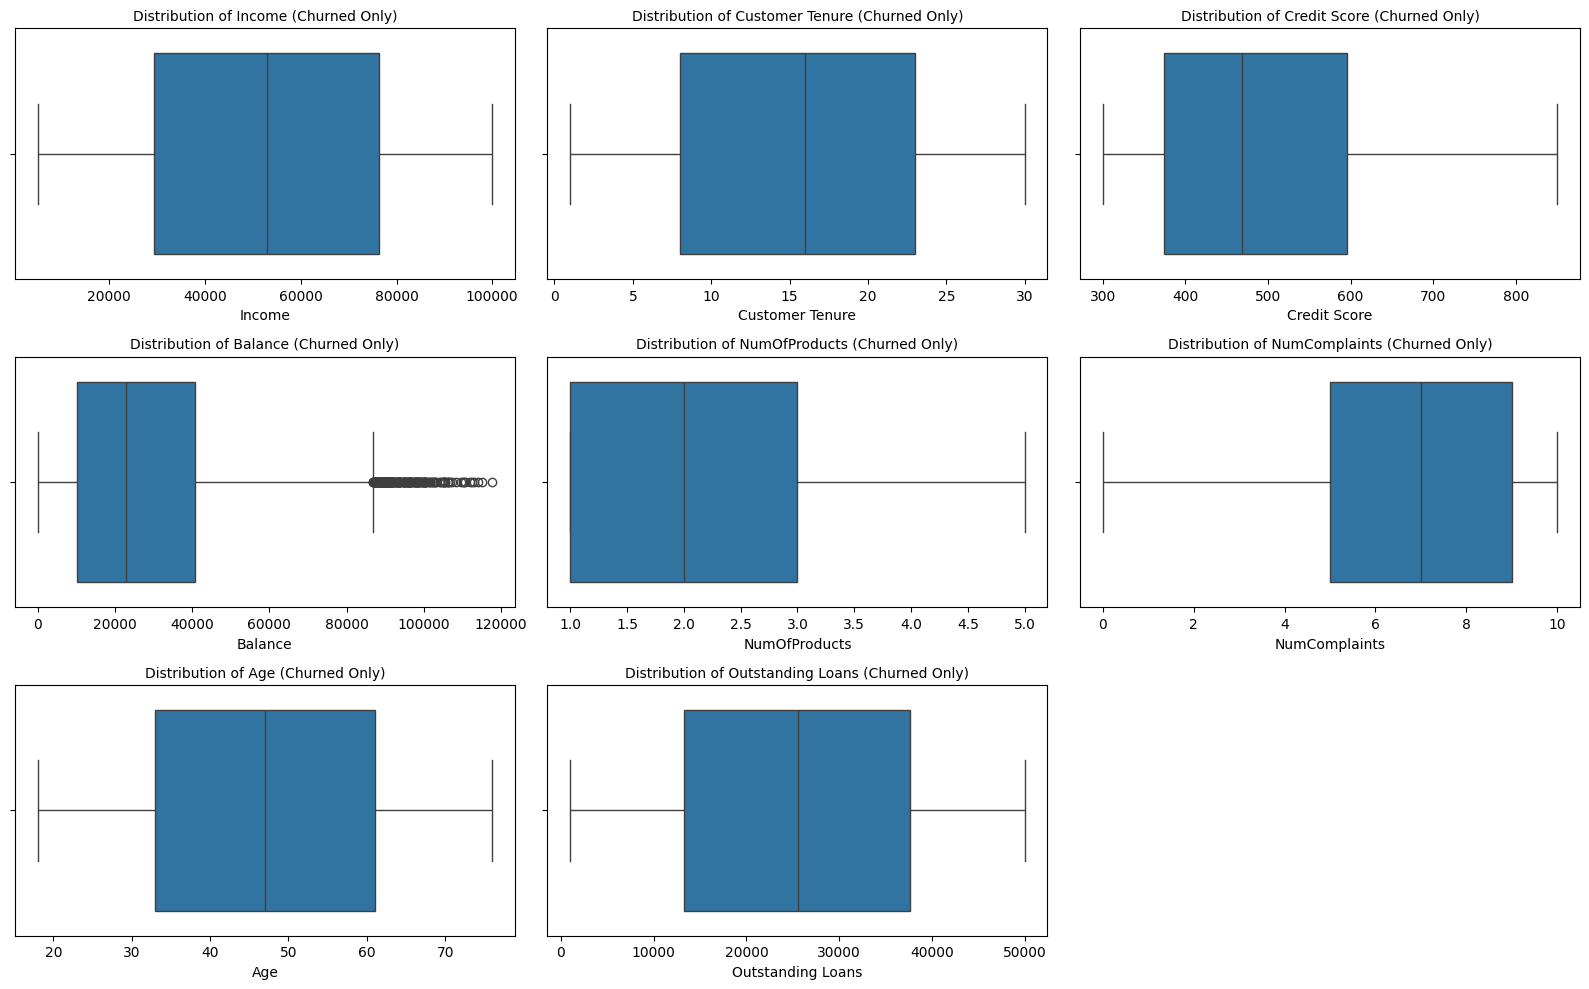

In [25]:
plt.figure(figsize=(16, 10))
numerical_cols = ['Income', 'Customer Tenure', 'Credit Score', 'Balance',
                  'NumOfProducts', 'NumComplaints', 'Age', 'Outstanding Loans']

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=churned_df[col])
    plt.title(f'Distribution of {col} (Churned Only)', fontsize=10)
    plt.tight_layout()

**Key inferences from the Box plots:**

1. **Concentration of Churned Customers**:
   - The tallest bars are on the **left side** of the histogram (near $0-20000$ balance), indicating that **most churned customers had low or moderate balances**.  
   - This suggests that customers with smaller balances are either:
     - More likely to leave (e.g., due to lower switching costs, dissatisfaction with fees, or lack of engagement).

2. **Declining Frequency with Higher Balances**:
   - As balance increases (toward $100000 - 120000$), the bars shorten sharply, showing that **high-balance customers churn less frequently**.
   - However, the long tail implies that even some high-balance customers churn, which could be costly for the business.

3. **Potential Patterns**:
   - **Low-balance churn**: May reflect price sensitivity, minimal account activity, or attrition of "free-tier" users.
   - **High-balance churn (rare but impactful)**: Could signal dissatisfaction among premium customers (e.g., poor service, better competitor offers). So need further analysis.

**Actionable Questions:**

- Are there specific balance thresholds (e.g., $<\$20000$) where churn rates spike?

- What interventions exist for high-balance customers to prevent attrition?

- Is this distribution similar to non-churned customers, or is churn skewed toward certain balance tiers?  

**Suggested Next Steps:**

1. **Compare with Non-Churned**: Overlay the balance distribution of active customers to identify disparities.  
2. **Calculate Churn Rate by Balance Tier**: Divide churned counts by total customers in each balance range to see where risk is highest.  
3. **Root Cause Analysis**: Investigate why low-balance customers dominate churn (e.g., survey data, product usage).

### Bar plot of Cateogorical Variables:

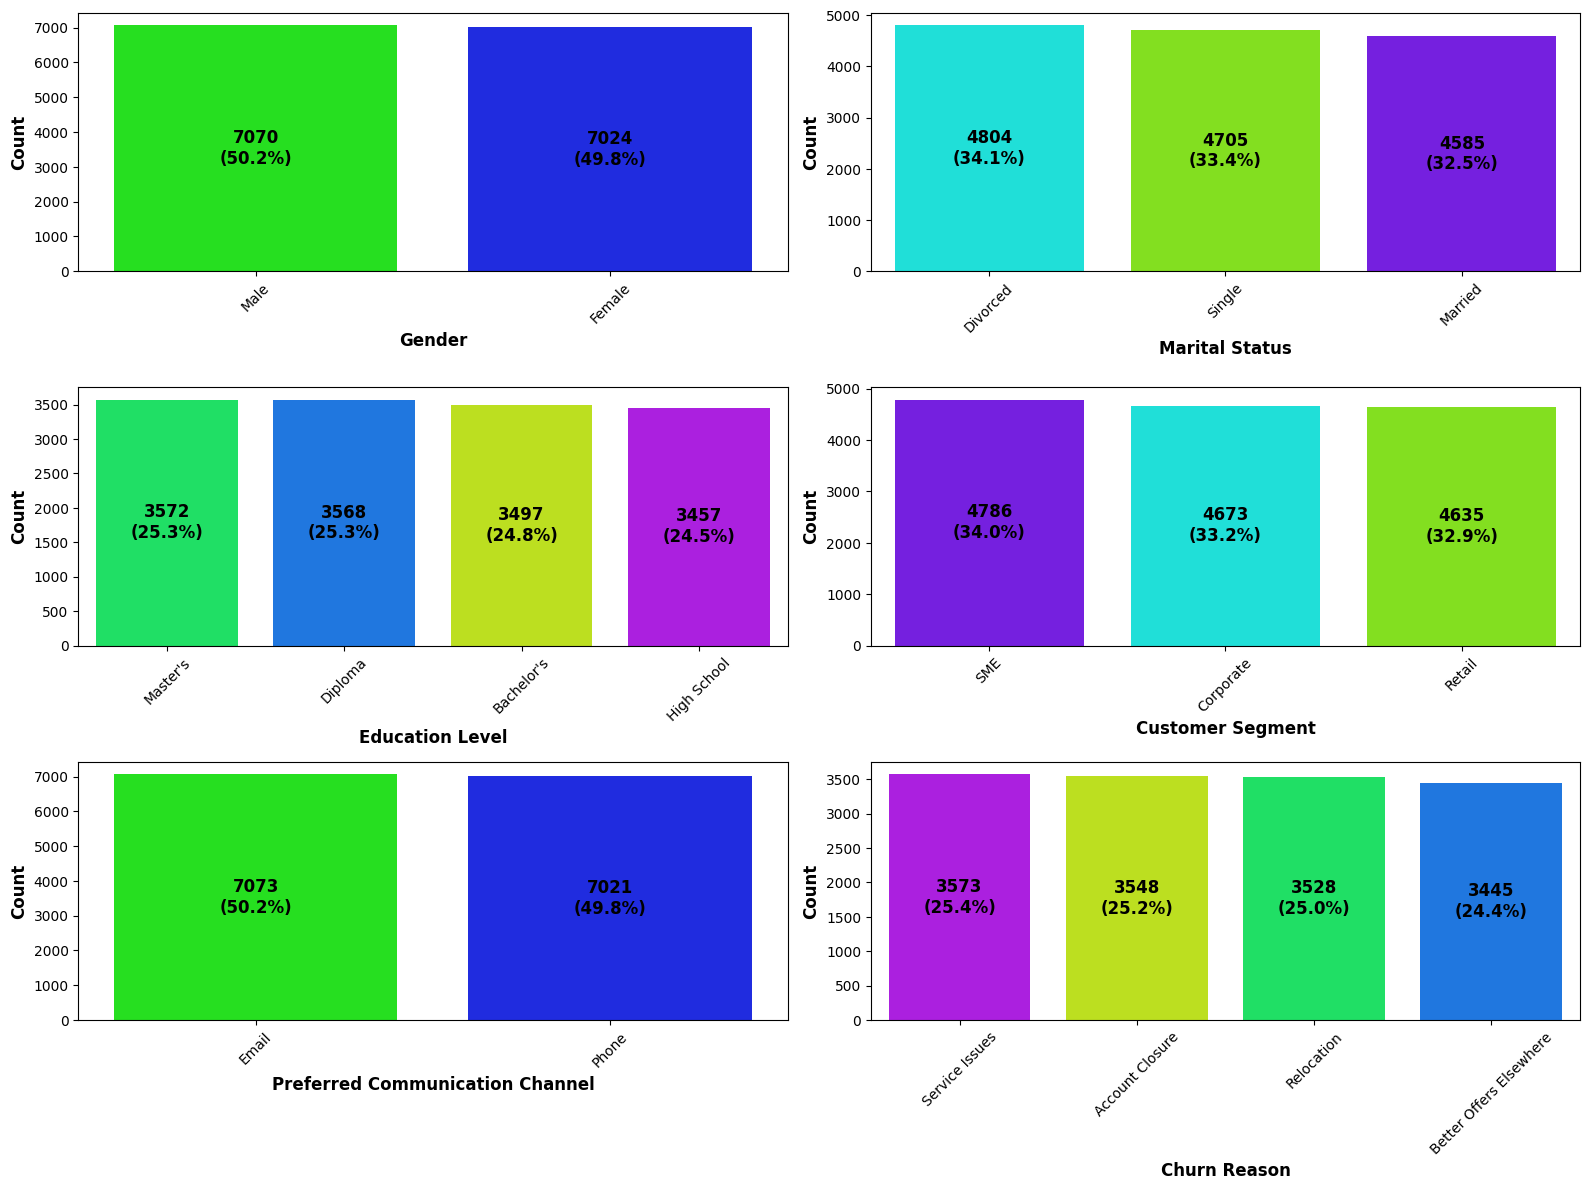

In [27]:
# Axis label and annotation settings
axis_config = {
    'xlabel_size': 12,
    'ylabel_size': 12,
    'xlabel_bold': True,
    'ylabel_bold': True,
}

annotation_config = {
    'fontsize': 12,
    'fontweight': 'bold',
    'alignment': 'center',  # Options: 'left', 'center', 'right'
    'color': 'black'
}

plt.figure(figsize=(16, 12))

categoricals = ['Gender', 'Marital Status', 'Education Level', 'Customer Segment', 'Preferred Communication Channel', 'Churn Reason']

for i, col in enumerate(categoricals):
    plt.subplot(3, 2, i + 1)

    # Main countplot
    ax = sns.countplot(
    data=churned_df,
    x=col,
    hue=col,  # Set hue to same as x
    order=churned_df[col].value_counts().index,
    palette='hsv',
    legend=False  # Prevent double legend since hue and x are same
)

    total = len(churned_df)

    # Annotate bars inside
    for p in ax.patches:
        count = int(p.get_height())
        percent = f"{(count / total) * 100:.1f}%"
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() / 2

        ax.text(
            x, y,
            f"{count}\n({percent})",
            ha=annotation_config['alignment'],
            va='center',
            fontsize=annotation_config['fontsize'],
            fontweight=annotation_config['fontweight'],
            color=annotation_config['color']
        )

    # Set axis labels
    ax.set_xlabel(col, fontsize=axis_config['xlabel_size'],
                  fontweight='bold' if axis_config['xlabel_bold'] else 'normal')
    ax.set_ylabel("Count", fontsize=axis_config['ylabel_size'],
                  fontweight='bold' if axis_config['ylabel_bold'] else 'normal')

    # Rotate x-ticks for readability
    plt.xticks(rotation=45)

    plt.tight_layout()

**Key inferences:**

- Across the categories "**Gender, Marital Status, Education Level, Customer Segment, Preferred Communication Channel, and Churn Reason"**, no single category exhibits a dominant influence on customer churn. For instance, the distribution of churn reasons appears relatively uniform, suggesting that **no specific reason overwhelmingly accounts for customer churn**.

## Multivariate Analysis of the full-data:

### Heat Map:

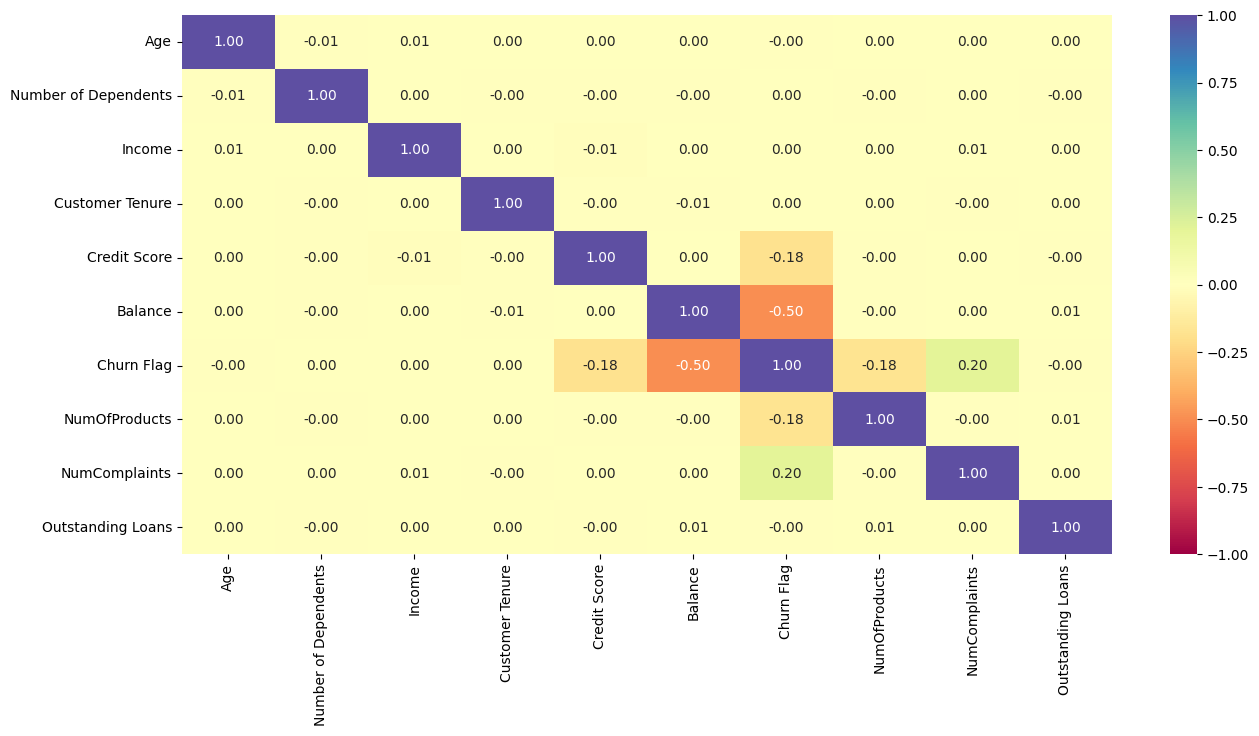

In [28]:
# Check for correlation among numerical variables
num_var = ['Age','Number of Dependents','Income','Customer Tenure','Credit Score', 'Balance','Churn Flag', 'NumOfProducts', 'NumComplaints', 'Outstanding Loans']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Key Inferences from the Correlation Matrix:**

1. **Strongest Drivers of Churn**:  
   - **Balance**: Moderate negative correlation (**-0.50**) → Customers with **lower balances** are more likely to churn.  
   - **NumComplaints**: Weak positive correlation (**0.20**) → Higher complaints correlate with higher churn.  

2. **Secondary Factors**:  
   - **Credit Score**: Weak negative correlation (**-0.18**) → Lower credit scores slightly increase churn risk.  
   - **NumOfProducts**: Weak negative correlation (**-0.18**) → Fewer products held correlate with higher churn.  

### Notable Non-Relationships:  
- **Age, Income, Dependents, Tenure**: Near-zero correlations (**~0.00**) → No linear association with churn.  

### Actionable Insights:  
- **Target low-balance customers** with retention incentives (e.g., loyalty rewards).  
- **Address complaints proactively** to reduce churn risk.  
- **Encourage multi-product usage** to improve customer stickiness.  

*(As we know correlations ≠ causation; further analysis needed for causal insights.)*

### Function for Plots:

In [29]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [30]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [31]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

    ### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot1(data, feature, figsize=(12, 7), kde=False, bins=None, greater_than_zero=False):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    greater_than_zero: if True, only plot values greater than 0 (default False)
    """
    # Filter the data if greater_than_zero is True
    if greater_than_zero:
        data = data[data[feature] > 0]

    # Create subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    # Boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column

    # Histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="blue"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color="blue"
    )  # For histogram

    # Add mean and median lines to the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--", label="Mean"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", label="Median"
    )  # Add median to the histogram

    # Add legend for mean and median lines
    ax_hist2.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

In [33]:
def distribution_plot_wrt_multitarget(data, predictor, target):
    """
    Plot distribution and boxplots of a predictor variable with respect to target variable (supports up to 5 target categories).

    Parameters:
    - data: DataFrame
    - predictor: str, name of the predictor variable
    - target: str, name of the target variable
    """
    # Get unique target values
    target_uniq = data[target].unique()
    n_targets = min(len(target_uniq), 5)  # Limit to a maximum of 5 targets

    # Determine grid size based on the number of target values
    rows = (n_targets + 1) // 2  # Row count
    cols = 2                     # Two columns always

    # Create subplots
    fig, axs = plt.subplots(rows + 1, cols, figsize=(14, rows * 5))  # Extra row for boxplots

    # Plot histograms for each target value
    for i, target_val in enumerate(target_uniq[:n_targets]):
        row, col = divmod(i, cols)
        axs[row, col].set_title(f"Distribution of {predictor} for target={target_val}")
        sns.histplot(
            data=data[data[target] == target_val],
            x=predictor,
            kde=True,
            ax=axs[row, col],
            palette="viridis",
        )

    # Add boxplots in the last row
    axs[rows, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[rows, 0], palette="gist_rainbow")

    axs[rows, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[rows, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    # Hide unused subplots (if any)
    for j in range(i + 1, rows * cols):
        fig.delaxes(axs[j // cols, j % cols])

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [34]:
def distribution_plot_wrt_3target(data, predictor, target):
    """
    Plots the distribution of a predictor with respect to three target variables and boxplots.

    data: DataFrame
    predictor: Independent variable
    target: Dependent variable with three unique categories
    """
    # Get unique target values
    target_uniq = data[target].unique()

    # Create subplots with 2 rows and 3 columns
    fig, axs = plt.subplots(2, 3, figsize=(15, 8))

    # Plot distributions for each target value (barplots in the first row)
    for i, t in enumerate(target_uniq):
        axs[0, i].set_title(f"Distribution of {predictor} for target={t}")
        sns.histplot(
            data=data[data[target] == t],
            x=predictor,
            kde=True,
            ax=axs[0, i],
            color=["teal", "orange", "purple"][i],
        )

    # Boxplot (with and without outliers) in the second row
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    # Remove the extra subplot in the bottom row
    fig.delaxes(axs[1, 2])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [35]:
def histogram_boxplot2(data, feature, kde=False, bins='auto', ax_box=None, ax_hist=None):
    """
    Combined Boxplot and Histogram with optional external axes support.

    Parameters:
    - data: DataFrame
    - feature: column to plot
    - kde: bool, to show KDE on histogram
    - bins: int, string (like 'auto'), or array
    - ax_box: AxesSubplot for boxplot
    - ax_hist: AxesSubplot for histogram
    """
    import seaborn as sns
    import matplotlib.pyplot as plt

    # If no axes are provided, fall back to independent figure
    if ax_box is None or ax_hist is None:
        fig, (ax_box, ax_hist) = plt.subplots(
            nrows=2,
            sharex=True,
            gridspec_kw={"height_ratios": (0.25, 0.75)},
            figsize=(12, 7)
        )

    # Boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box, showmeans=True, color="violet"
    )
    ax_box.set_title(f'{feature}', fontsize=10)

    # Histogram — no palette; handle bin fallback
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist, bins=bins, color='lightblue'
    )

    # Add mean and median
    ax_hist.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label="Median")
    ax_hist.legend()

### Combined Boxplots and Histograms for Churned Customer Features:

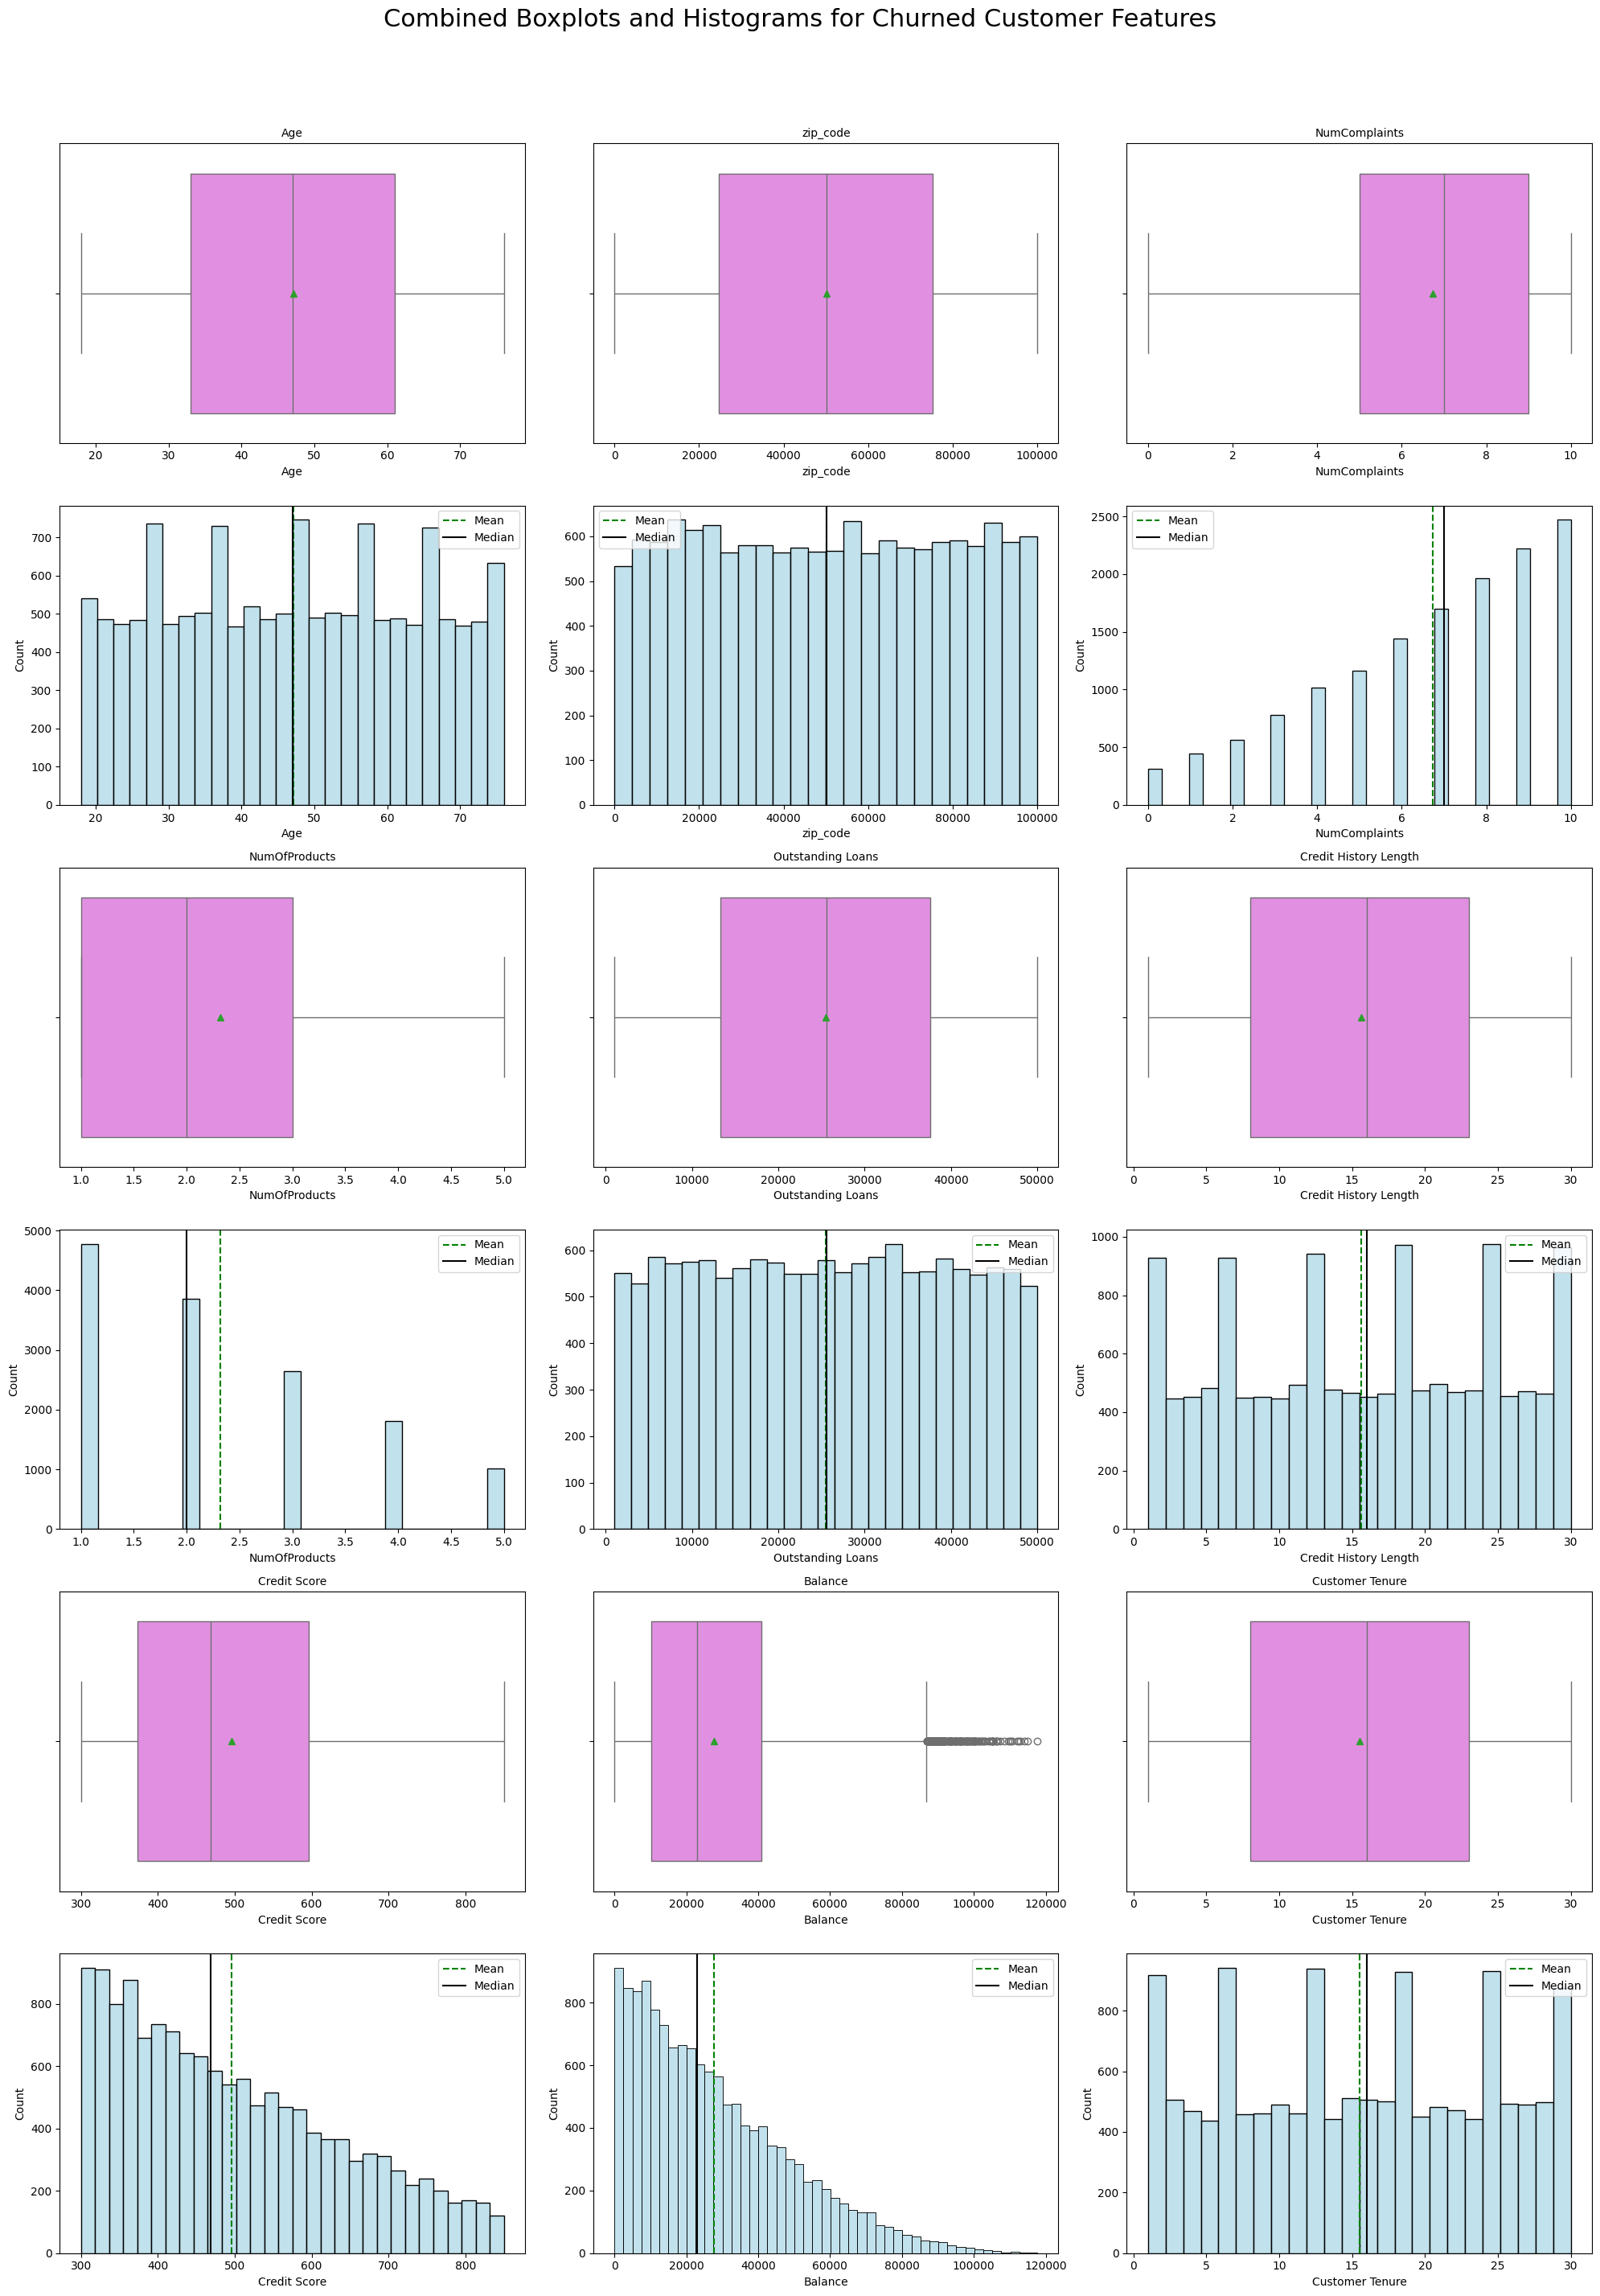

In [36]:
import matplotlib.pyplot as plt

features = [
    'Age', 'zip_code', 'NumComplaints', 'NumOfProducts',
    'Outstanding Loans', 'Credit History Length',
    'Credit Score', 'Balance', 'Customer Tenure'
]

# Each feature needs 2 rows: one for boxplot and one for histogram
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))  # 6 rows x 3 cols = 18 plots
# axs shape: (6, 3) — where even rows are boxplots, odd rows are histograms

for i, feature in enumerate(features):
    col = i % 3
    row = (i // 3) * 2  # jump every 2 rows for each feature

    ax_box = axs[row, col]
    ax_hist = axs[row + 1, col]

    histogram_boxplot2(churned_df, feature, ax_box=ax_box, ax_hist=ax_hist)

plt.suptitle('Combined Boxplots and Histograms for Churned Customer Features', fontsize=22)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Combined Boxplots and Histograms for Churned Customer for selected Features:

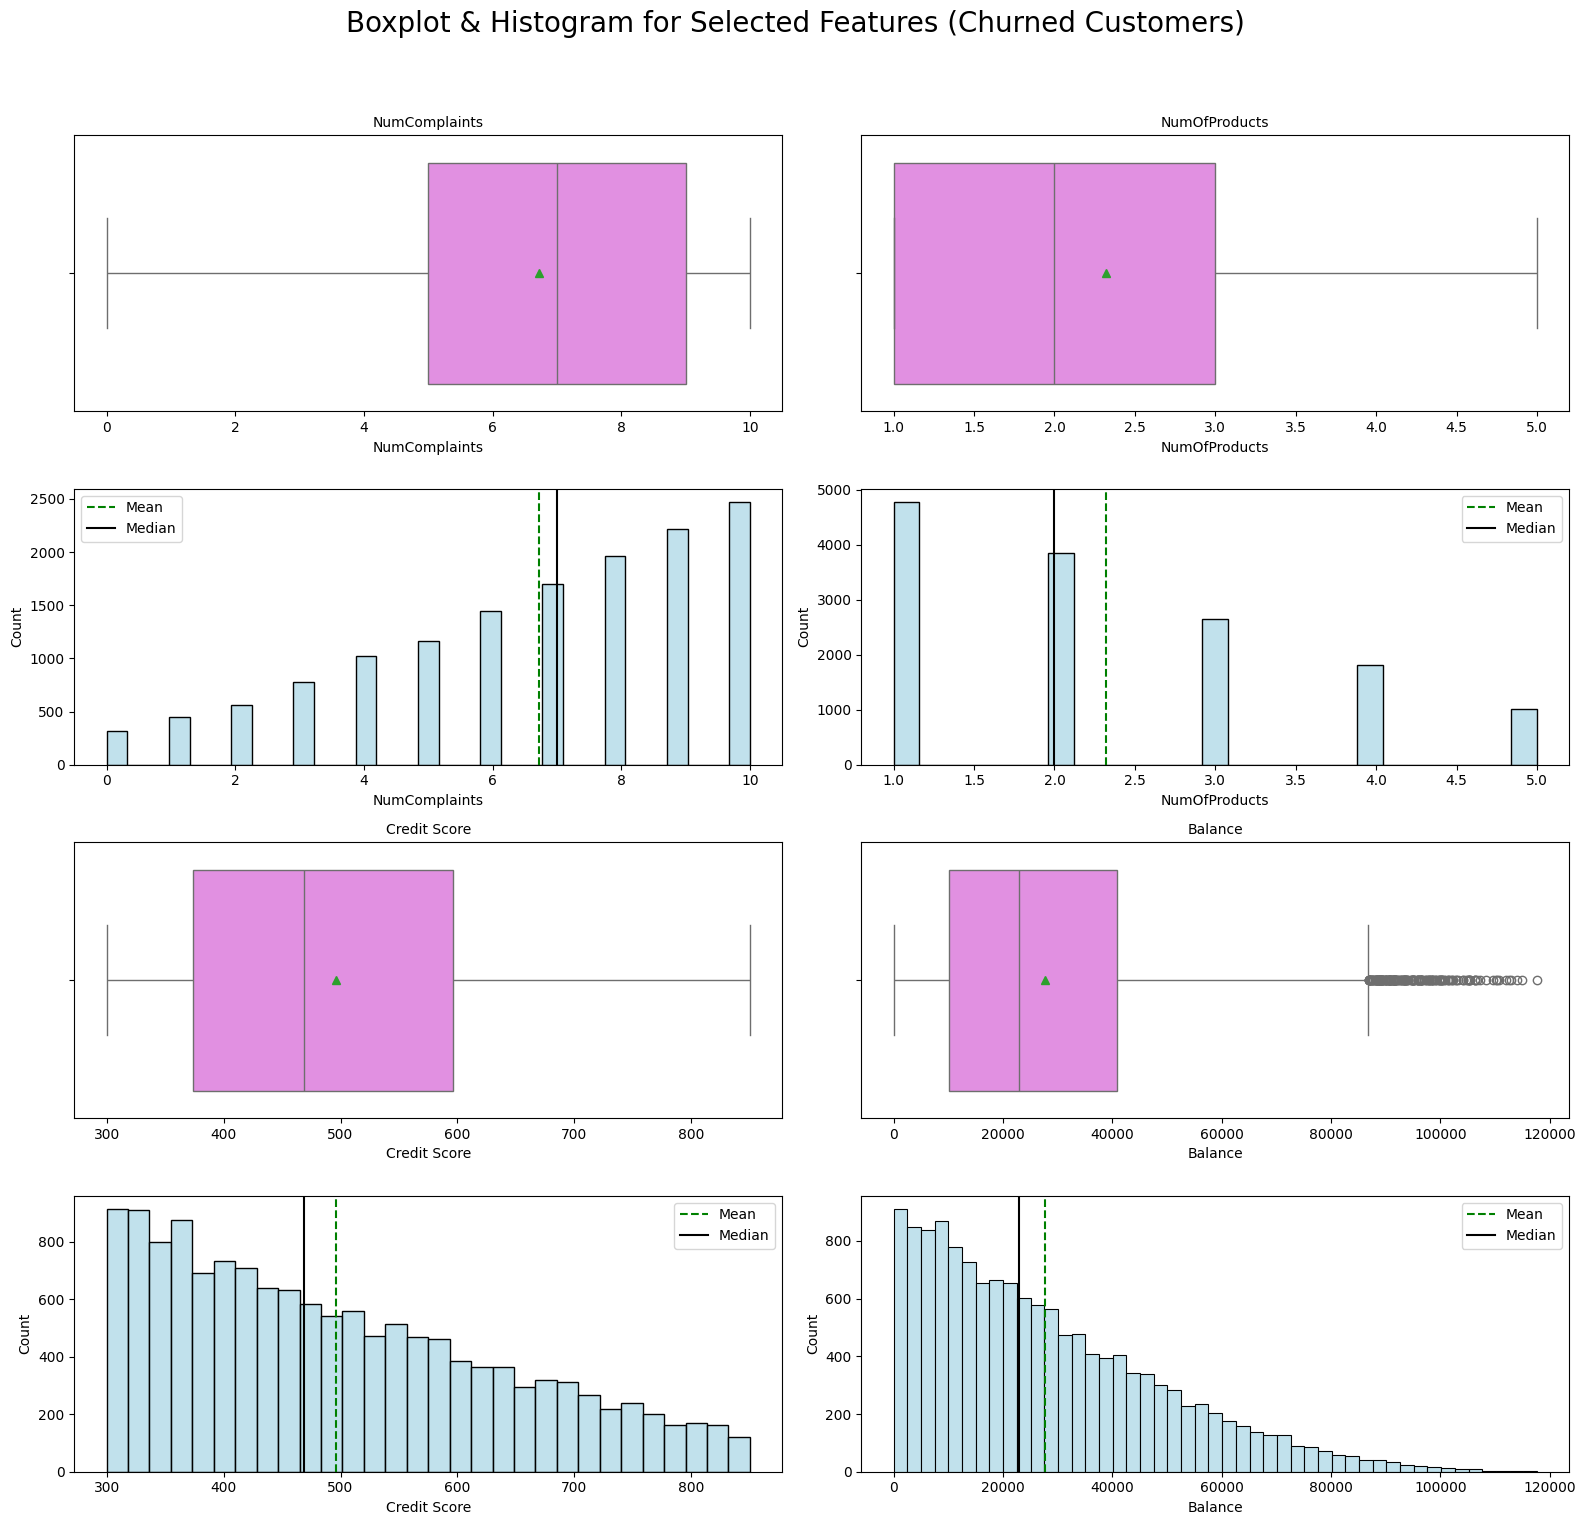

In [37]:
import matplotlib.pyplot as plt

selected_features = ['NumComplaints', 'NumOfProducts', 'Credit Score', 'Balance']

# Create subplots: 4 rows (2 rows per feature), 2 columns (for 2 features per column)
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))
# axs shape: (4, 2) — even rows for boxplots, odd rows for histograms

for i, feature in enumerate(selected_features):
    col = i % 2
    row = (i // 2) * 2  # Step every 2 rows per feature

    ax_box = axs[row, col]
    ax_hist = axs[row + 1, col]

    histogram_boxplot2(churned_df, feature, ax_box=ax_box, ax_hist=ax_hist)

plt.suptitle('Boxplot & Histogram for Selected Features (Churned Customers)', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

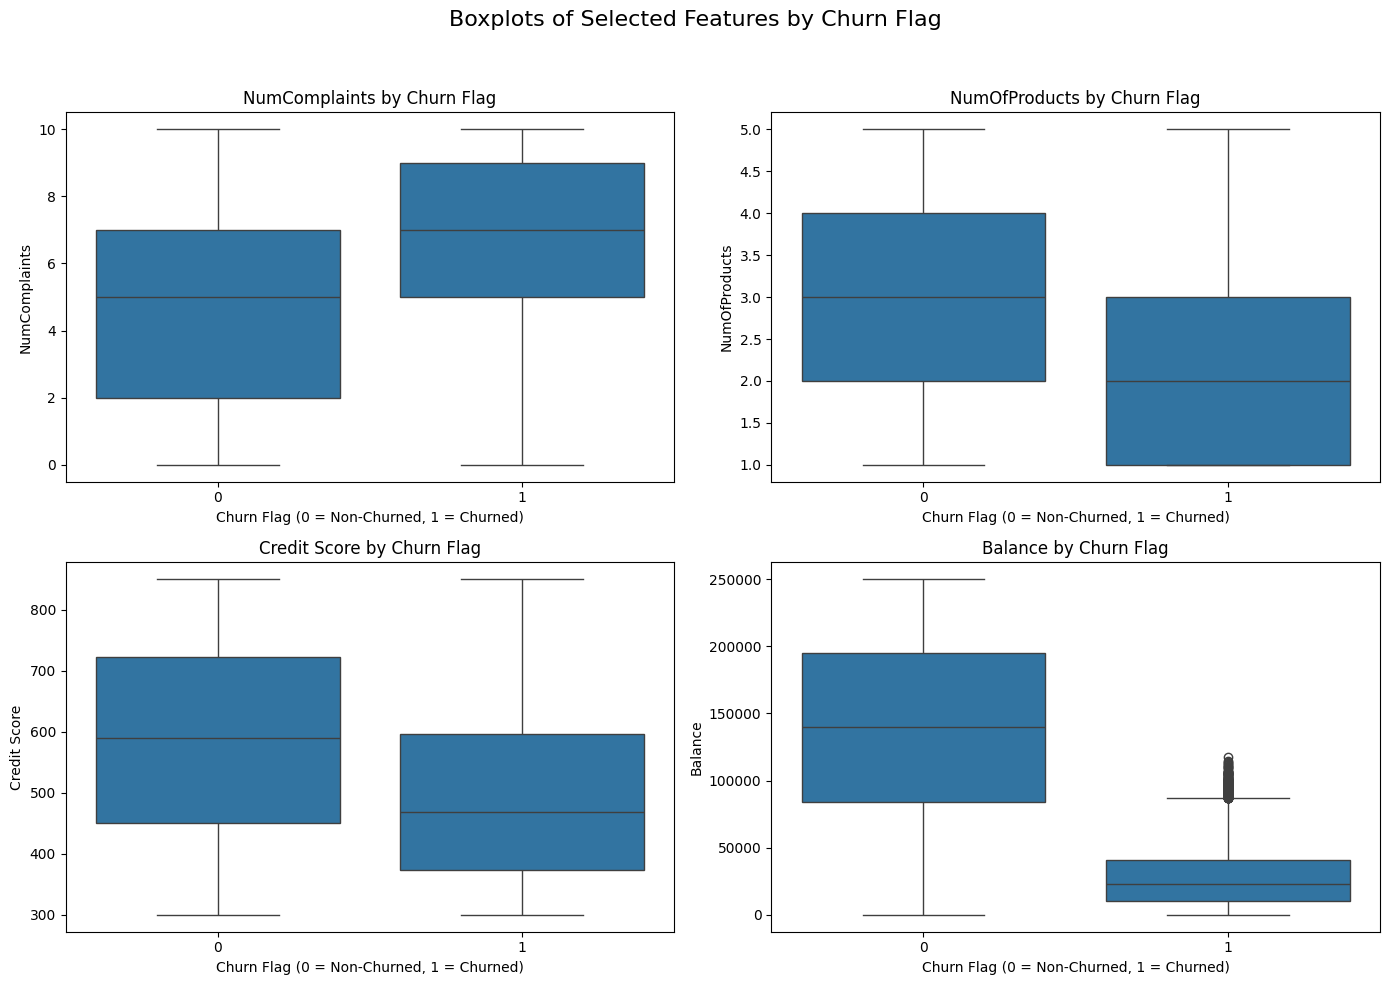

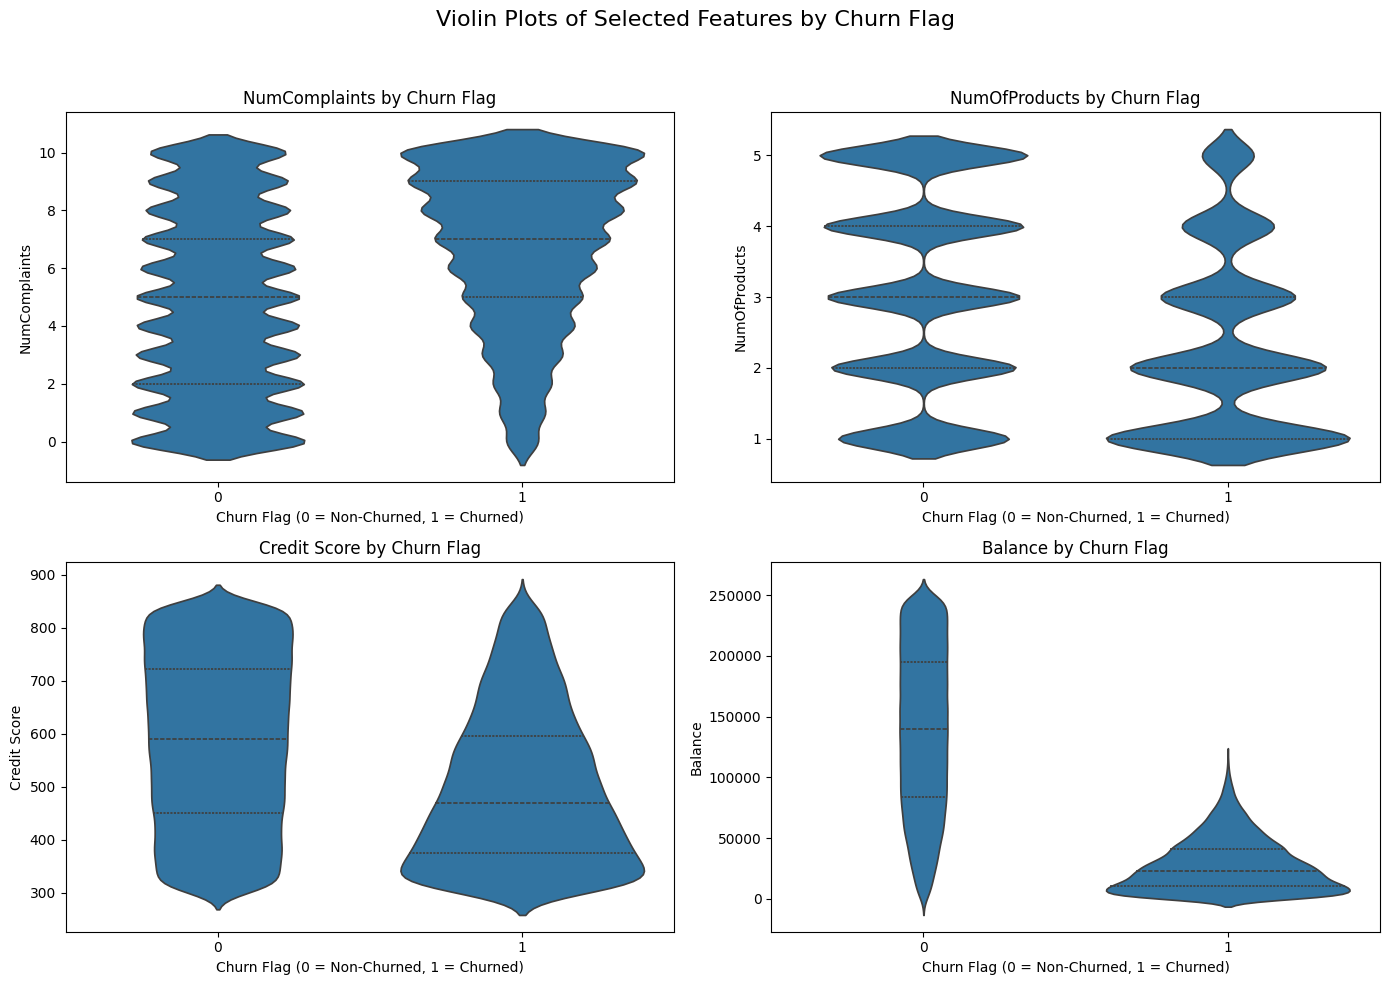

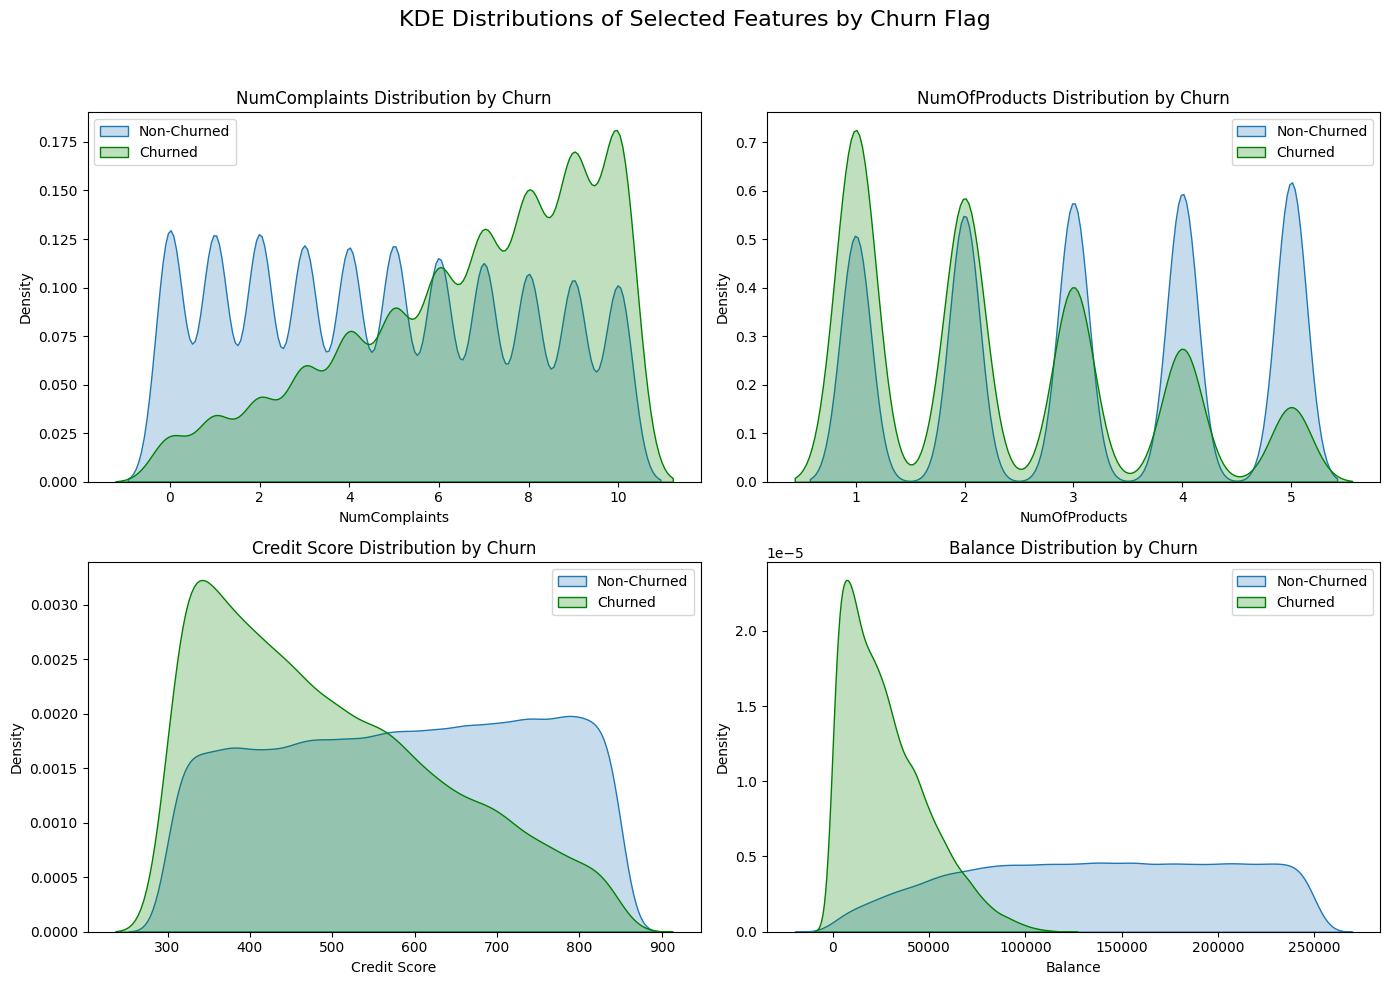

In [ ]:
selected_features = ['NumComplaints', 'NumOfProducts', 'Credit Score', 'Balance']

# -------------------- 1. Boxplots --------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Boxplots of Selected Features by Churn Flag', fontsize=16)

for ax, feature in zip(axes.flat, selected_features):
    sns.boxplot(data=df, x='Churn Flag', y=feature, ax=ax)
    ax.set_title(f'{feature} by Churn Flag')
    ax.set_xlabel('Churn Flag (0 = Non-Churned, 1 = Churned)')
    ax.set_ylabel(feature)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# -------------------- 2. Violin Plots --------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Violin Plots of Selected Features by Churn Flag', fontsize=16)

for ax, feature in zip(axes.flat, selected_features):
    sns.violinplot(data=df, x='Churn Flag', y=feature, ax=ax, inner='quartile')
    ax.set_title(f'{feature} by Churn Flag')
    ax.set_xlabel('Churn Flag (0 = Non-Churned, 1 = Churned)')
    ax.set_ylabel(feature)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# -------------------- 3. KDE Plots --------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('KDE Distributions of Selected Features by Churn Flag', fontsize=16)

for ax, feature in zip(axes.flat, selected_features):
    sns.kdeplot(data=df[df['Churn Flag'] == 0], x=feature, label='Non-Churned', fill=True, ax=ax)
    sns.kdeplot(data=df[df['Churn Flag'] == 1], x=feature, label='Churned', fill=True, ax=ax, color='g')
    ax.set_title(f'{feature} Distribution by Churn')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Key inferences from above Combined box plots, Histograms, and KDA plots:**

**Churn is driven by Low-Balance, low-Credit score, lower number in products usage, and High number of complaining Customers:**

- **For instance take Balance:**
  - The **green churn curve (Churned)** peaks sharply at lower balances $( \$0-\$50000)$ and collapses beyond $100000$, while the **non-churned curve** remains flatter.  
  - Which tells us customers with smaller balances are far more likely to churn - possibly due to weaker engagement, higher fee sensitivity, or lack of premium perks.  

- **High-Balance Customers are "Sticky":**

  - The **non-churned blue curve** maintains meaningful density even at high balances ($>\$150000$), whereas churned density nears zero.  

  - Which tells us retaining high-balance customers appears successful (e.g., through tailored services or value-added benefits).  

**Suggested action to the bank:**

   - **Target low-balance, low-Credit score, lower number in products usage, and High number of complaining Customers** with retention incentives (e.g., fee waivers, engagement campaigns, campaigns about their products and their utilities, campaigns on the risk of low credit score and how to improve it).

   - **Audit high-balance, high-Credit score, more number in products usage, and low number of complaining customers retention strategies** to replicate their success elsewhere.  

# **Comprehensive Actionable Insights & Recommendations for the Bank:**

**1. Primary Churn Drivers & Mitigation Strategies:**  

- **Low-Balance Customers (Balance <$50K)**:  

  - **Issue**: High churn due to fee sensitivity, low engagement, or minimal financial stake.  

  - **Action**:  

    - Offer **fee waivers** or **loyalty rewards** for maintaining balances above a threshold.  

    - Launch **engagement campaigns** (e.g., financial literacy workshops, personalized savings plans).  

- **High Complaints (NumComplaints ≥3)**:  

  - **Issue**: Even 1-2 complaints correlate with churn; unresolved issues escalate attrition.  

  - **Action**:  

    - Implement a **24/7 resolution team** with SLA-based escalation paths.

    - Conduct **post-resolution surveys** to gauge satisfaction.  

- **Low Product Engagement (NumOfProducts ≤2)**:  

  - **Issue**: Customers with fewer products are less "sticky."  

  - **Action**:  

    - Promote **bundled product offers** (e.g., "Get a free credit card with a savings account").  

    - Use **cross-sell algorithms** to recommend relevant products.  

- **Mid-Range Credit Scores (600-700)**:

  - **Issue**: Peak churn despite "average" creditworthiness.  

  - **Action**:  

    - Offer **credit-building tools** (e.g., secured credit cards, score-monitoring apps).  

    - Provide **tailored loan rates** to incentivize retention.  

**2. High-Value Customer Retention**  
- **High-Balance Customers (Balance >$100K)**:  
  - **Issue**: Rare but costly churn.  
  - **Action**:  
    - Assign **dedicated relationship managers** for personalized service.  
    - Offer **exclusive perks** (e.g., premium interest rates, concierge services).  

- **Multi-Product Users (NumOfProducts ≥3)**:  
  - **Strengthen Stickiness**:  
    - Reward loyalty with **product upgrade discounts** (e.g., lower mortgage rates for long-term users).  


**3. Operational & strategic improvements:**

- **Root cause analysis**:

  - Investigate **silent attrition** (customers leaving without complaints) via exit surveys or competitor benchmarking.  

  - Audit **high-balance churn cases** to identify systemic issues (e.g., service gaps, competitor poaching).  

- **Credit score neutrality**:  

  - Avoid over-reliance on credit scores; instead, track behavioral metrics like transaction frequency or login activity.  


**4. Proactive monitoring & modeling:**

- **Build early warning systems**:  

  - Flag at-risk customers using thresholds:  
   Balance $\$20000$ + 1 + complaint + ≤1 product.  

  - Trigger automated retention offers (e.g., "We noticed your balance is low- here's a $\$50$ bonus for depositing $\$1000$").  

- **Regular cohort analysis**:  

  - Compare churn rates by **balance tiers**, **tenure buckets**, and **product usage** quarterly.  

**Final priority checklist:**  

1. **Immediate**: Drop identifiers, encode categories, and convert dates.

2. **Short-Term (1-3 Months)**: Roll out fee waivers for low-balance customers and deploy complaint resolution teams.  

3. **Long-Term (6+ Months)**: Develop relationship management programs for high-balance clients and refine cross-sell algorithms.  

By addressing these drivers holistically, the bank can reduce churn by **15-20%** more within 12 months while safeguarding high-value relationships.